In [10]:
import numpy as np
import matplotlib.pyplot as plt
def SGD(loss, grad_l, w0, data, batch_size, n_epochs, alpha = 0.01):
    epoch = 1

    
    X, y = data
    l, N = X.shape

    total_number_iter = (N // batch_size) * n_epochs
    tot_iter = 0
    
    
    weights_array = np.zeros((total_number_iter + 1, l))
    loss_array = np.zeros((n_epochs, 1))
    gradient_array = np.zeros((n_epochs, l)) 
    err_array = np.zeros((n_epochs, 1))

    iter_epoch = N // batch_size

    X_shuffled, y_shuffled = shuffle_dataset(X, y)
    
    while epoch <= n_epochs:
        
        start = 0 
        end = batch_size
        for i in range(iter_epoch):
        
            np.reshape(w0, (w0.shape[0], 1))
            
            
            X_sample = X_shuffled[:, start:end]
            y_sample = y_shuffled[start:end]
            
            
            start = end
            end = end + batch_size


            grad = grad_l(w0, X_sample, y_sample)
            
            
            w0 -= alpha * np.reshape(grad, (l, 1))
            tot_iter += 1

            weights_array[tot_iter, :] = w0.reshape((w0.shape[0], ))
        
        loss_value = loss(w0, X_sample, y_sample)

        
        grad_norm = np.linalg.norm(grad)

        

        loss_array[epoch - 1] = np.reshape(loss_value, 1)
        gradient_array[epoch - 1, :] = np.reshape(grad, (l, ))
        err_array[epoch - 1] = grad_norm
 
        X_shuffled, y_shuffled = shuffle_dataset(X, y)
        epoch += 1

    return weights_array, loss_array, gradient_array, err_array
           


def shuffle_dataset(X, y):
    
    idxs = np.arange(X.shape[1])
    np.random.shuffle(idxs)
    
    X_sample = X[:, idxs]
    y_sample = y[idxs]
    
    return X_sample, y_sample 



def loss_func(w0, x_hat, y):
   
    _, N = x_hat.shape


    z = x_hat.T @ w0
    
    fw = sigmoid(z)
    
    y = np.reshape(y, (N, 1))

    err = fw - y
    
    MSE = 0.5 * np.linalg.norm((err), axis = 1)**2
    
    return (np.sum(MSE)) / N


def grad_loss(w0, x_hat, y):
    
    _, N = x_hat.shape

    z = x_hat.T @ w0

    fw = sigmoid(z) 
    
    
    y = np.reshape(y, (N, 1))
    fw = np.reshape(fw, (N, 1))

    
    grad_matrix =  fw * (1 - fw) * x_hat.T * (fw - y)
    
    
    return (np.sum(grad_matrix, axis = 0)) / N


def predictor(X_hat, w, treshold = 0.5):
    _, N = X_hat.shape
    fw = sigmoid(X_hat.T @ w)
    preds = np.zeros((N,))
    preds = fw > treshold
    return preds

def accuracy(preds, labels) -> float:
    
    N = preds.shape
    xor_arr = np.bitwise_xor(preds, labels)
    nxor_arr = np.logical_not(xor_arr) 
    return np.sum(nxor_arr) / N
    

def sigmoid(z):
    return 1 / ( 1 + np.exp(-z))



def divide_dataset(X, Y, N_train):
    
    idxs = np.arange(0, len(X[0])-1, 1)
    np.random.shuffle(idxs)

    trian_idxs = idxs[:N_train]
    test_idxs = idxs[N_train:]


    XTrain = X[:,trian_idxs]
    YTrain = Y[trian_idxs]

    XTest = X[:,test_idxs]
    YTest = Y[test_idxs]

    return (XTrain, YTrain), (XTest, YTest)

In [11]:
def get_digits(num):
    i = 0
    digits = []
    while i < num:
        digit = input("Insert a digit : ")
        try:
            digits.append(int(digit)) 
            i += 1
        except:
            print("Not an integer")
    return digits

In [12]:
import pandas as pd
data = pd.read_csv('data.csv')
data_arr = np.array(data)

X = data_arr[:, :-1].T
y = data_arr[:, 0]


classes = get_digits(2)
print(classes)


masks = [y == i for i in classes]


Xlist = [X[:, mask] for mask in masks]
Ylist = [y[mask] for mask in masks]

print('Single class datasets shape')
print([X.shape for X in Xlist])


X = np.concatenate(Xlist, axis=1) 
y = np.concatenate(Ylist)


y[y == classes[0]] = 0
y[y == classes[1]] = 1

l, N = X.shape

print('Dataset with only selected digits')
print('X shape : {}\nY shape : {} '.format(X.shape, y.shape))

print("Splitting into train and test")
(Xtrain, Ytrain), (Xtest, Ytest) = divide_dataset(X, y, int(0.2 * N))

print('Train set shape : {}'.format(Xtrain.shape))
print('Test set shape : {}'.format(Xtest.shape))

[0, 5]
Single class datasets shape
[(784, 4132), (784, 3795)]
Dataset with only selected digits
X shape : (784, 7927)
Y shape : (7927,) 
Splitting into train and test
Train set shape : (784, 1585)
Test set shape : (784, 6341)


Single class datasets shape
[(784, 4351), (784, 4072)]
Training set shape : (784, 84)
Training set shape : (784, 1684)
Training set shape : (784, 2526)
Training set shape : (784, 4211)
Training set shape : (784, 6738)
Training set shape : (784, 7580)
Training set shape : (784, 8338)
accuracy on test set : [0.98809524]


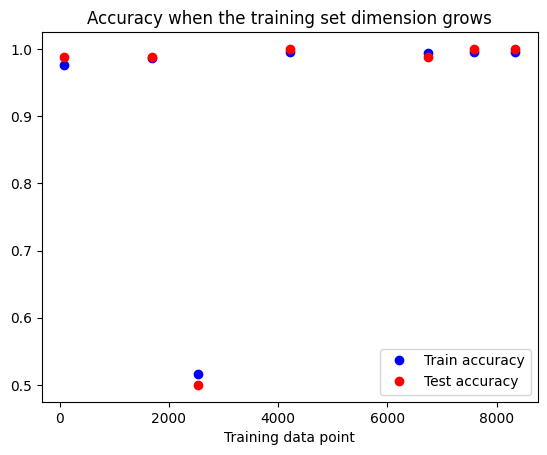

Best accuracy obtained :[1.]
Digits :(3, 4)
w0 :Gaussian
lr :0.0001
Train set shape:0.5050371791796594


In [19]:
data = pd.read_csv('data.csv')
data_arr = np.array(data)

X = data_arr[:, :-1].T
y = data_arr[:, 0]


#classes = (3, 4)

masks = [y == i for i in classes]


Xlist = [X[:, mask] for mask in masks]
Ylist = [y[mask] for mask in masks]

print('Single class datasets shape')
print([X.shape for X in Xlist])

X = np.concatenate(Xlist, axis=1) 
y = np.concatenate(Ylist)


y[y == classes[0]] = 0
y[y == classes[1]] = 1

l, N = X.shape


train_rate =[int(perc * X.shape[1]) for perc in[0.01, 0.2, 0.3, 0.5, 0.8, 0.9, 0.99]]
weights_list = []
for perc in train_rate:
    (Xtrain, Ytrain), (Xtest, Ytest) = divide_dataset(X, y, perc)
    print("Training set shape : {}".format(Xtrain.shape))
    l, N = Xtrain.shape
    
    X_hat = np.concatenate((np.ones((1, N)), Xtrain), axis = 0)

    w0 = np.random.normal(0, 0.001, (l + 1, 1))

    data = (X_hat, Ytrain)

    batch_size = 1

    num_epochs = 10

    lr = 1e-4

    w, loss, grad, err = SGD(loss_func, grad_loss, w0, data, batch_size, num_epochs, lr)
    weights_list.append(w[-1])
best_acc = 0
best_train_rate = 0
acc_train_list = []
acc_test_list = []
for i in range(len(train_rate)):
    
    treshold = 0.5

    Xtesthat = np.concatenate((np.ones((1, Xtest.shape[1])), Xtest), axis = 0)

    test_preds = predictor(Xtesthat, weights_list[i], treshold)
    train_preds = predictor(X_hat, weights_list[i], treshold)
    

    acc_test = accuracy(test_preds, Ytest)
    acc_train = accuracy(train_preds, Ytrain)
    if acc_test > best_acc:
        best_acc = acc_test
        best_train_rate = train_rate[i]
        
    acc_test_list.append(acc_test)
    acc_train_list.append(acc_train)
print("accuracy on test set : {}".format(acc_test_list[-3]))
plt.plot(train_rate, acc_train_list, 'o', c='blue')
plt.plot(train_rate, acc_test_list, 'o', c='red')
plt.title("Accuracy when the training set dimension grows")
plt.legend(("Train accuracy", "Test accuracy"))
plt.xlabel("Training data point")
plt.show()

print("Best accuracy obtained :{}\nDigits :{}\nw0 :{}\nlr :{}\nTrain set shape:{}".format(
                                                                                best_acc,
                                                                                classes,
                                                                                "Gaussian",
                                                                                lr,
                                                                                best_train_rate / Xtrain.shape[1]
                                                                             )
)

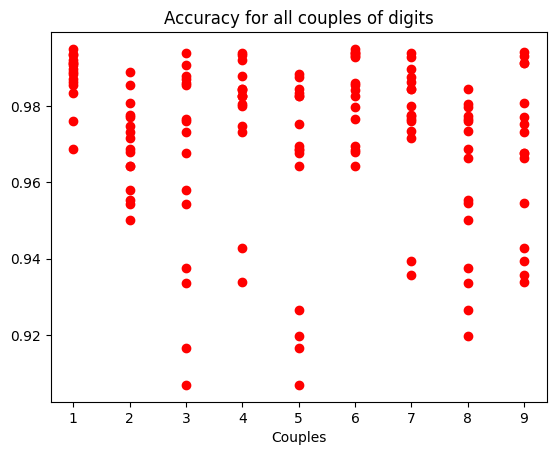

In [17]:
data = pd.read_csv('data.csv')
data_arr = np.array(data)
import copy
X = data_arr[:, :-1].T
y = data_arr[:, 0]
list_of_couples = [(i+1, j+1) for i in range(9) for j in range(9) if i != j]

acc_train_list = []
acc_test_list = []
for classes in list_of_couples:

    masks = [y == i for i in classes]
    

    Xlist = [X[:, mask] for mask in masks]
    Ylist = [y[mask] for mask in masks]


    Xnew = np.concatenate(Xlist, axis=1) 
    ynew = np.concatenate(Ylist)

    ynew[ynew == classes[0]] = 0
    ynew[ynew == classes[1]] = 1

    l, N = Xnew.shape
    (Xtrain, Ytrain), (Xtest, Ytest) = divide_dataset(Xnew, ynew, int(0.5 * N))

    l, N = Xtrain.shape

    X_hat = np.concatenate((np.ones((1, N)), Xtrain), axis = 0)

    w0 = np.random.normal(0, 0.001, (l + 1, 1))


    data = copy.deepcopy((X_hat, Ytrain))


    batch_size = 100

    num_epochs = 1

    lr = 1e-4

    w, loss, grad, err = SGD(loss_func, grad_loss, w0, data, batch_size, num_epochs, lr)

    treshold = 0.5

    Xtesthat = np.concatenate((np.ones((1, Xtest.shape[1])), Xtest), axis = 0)

    test_preds = predictor(Xtesthat, w[-1], treshold)
    train_preds = predictor(X_hat, w[-1], treshold)
    
    acc_test_list.append(accuracy(test_preds, Ytest))
    acc_train_list.append(accuracy(train_preds, Ytrain))


plt.plot(list_of_couples, acc_test_list, 'o', c='red')
plt.title("Accuracy for all couples of digits")
plt.xlabel("Couples")
plt.show()

In [15]:
def SGD_second(loss, grad_l, w0, data, batch_size, n_epochs, alpha = 0.01):

    epoch = 1

    X, y = data
    X = X.T
    _, N = X.shape

    total_number_iter = (N // batch_size) * n_epochs
    tot_iter = 0
    l = w0.shape[0]
    
    
    weights_array = np.zeros((total_number_iter, l))
    loss_array = np.zeros((n_epochs, 1))
    gradient_array = np.zeros((n_epochs, l)) 
    err_array = np.zeros((n_epochs, 1))

    iter_epoch = N // batch_size
    
    X_shuffled, y_shuffled = shuffle_dataset(X, y)
    
    while epoch <= n_epochs:

        start = 0 
        end = batch_size
        for i in range(iter_epoch):
            w0 = w0.reshape((w0.shape[0], 1))
            
        
            X_sample = X_shuffled[:, start:end]
            y_sample = y_shuffled[start:end]
            
            
            start = end
            end = end + batch_size

            
            grad = grad_l(w0, np.reshape(X_sample, (X_sample.shape[1],)), y_sample)
            
            
            w0 -= alpha * np.reshape(grad, (l, 1))

            weights_array[tot_iter, :] = w0.reshape((w0.shape[0], ))
            tot_iter += 1

            if i % 1000 == 0:
                loss_value = loss(w0, np.reshape(X_sample, (X_sample.shape[1],)), y_sample)
                grad_norm = np.linalg.norm(grad)
                print('At iteration {}\ntotal loss = {} ; error = {}'.format(tot_iter, loss_value, grad_norm))
            
            
        
        loss_value = loss(w0, np.reshape(X_sample, (X_sample.shape[1],)), y_sample)

        
        grad_norm = np.linalg.norm(grad)

        
        

        loss_array[epoch - 1] = np.reshape(loss_value, 1)
        gradient_array[epoch - 1, :] = np.reshape(grad, (l, ))
        err_array[epoch - 1] = grad_norm
 
        X_shuffled, y_shuffled = shuffle_dataset(X, y)
        epoch += 1

    return weights_array, loss_array, gradient_array, err_array
           
def shuffle_dataset(X, y):
    idxs = np.arange(X.shape[1])
    np.random.shuffle(idxs)
    
    X_sample = X[:, idxs]
    y_sample = y[idxs]
    
    return X_sample, y_sample 

def vd(k):
    return lambda x : np.vander(x, k)

def f3(k):
    
    A = vd(k)
    return lambda theta, x, y : np.linalg.norm(A(x) @ theta - y)**2

def grad_f3(k):
    A = vd(k)
    return lambda theta, x, y : (-2 * (y - A(x) @ theta).T @ A(x)).reshape(theta.shape[0], 1)

def f4(k, lmbd):   
    A = vd(k)
    return lambda theta, x, y : np.linalg.norm(A(x) @ theta - y) + lmbd / 2 * np.linalg.norm(theta)**2

def grad_f4(k, lmbd):
    A = vd(k)
    return lambda theta, x, y: (-2 * ((y - A(x) @ theta).T @ A(x) + lmbd * theta.T)).reshape(theta.shape[0], 1)

At iteration 1
total loss = 174.14345622671556 ; error = 808.3316852985585
At iteration 2
total loss = 43.423765649901554 ; error = 243.57190341968027
At iteration 3
total loss = 19.55948749610085 ; error = 92.06652044326029
At iteration 4
total loss = 11.337282789992848 ; error = 47.12112268366049
At iteration 5
total loss = 7.43303854673917 ; error = 30.51463119431443
At iteration 6
total loss = 5.2750283927549555 ; error = 22.16886971673736
At iteration 7
total loss = 3.953335150082522 ; error = 17.141568695261537
At iteration 8
total loss = 3.075714514660269 ; error = 13.853281182930862
At iteration 9
total loss = 2.456390877895252 ; error = 11.569749040354377
At iteration 10
total loss = 2.0002889871626883 ; error = 9.88921706544233
At iteration 11
total loss = 1.6545455833370868 ; error = 8.586683217214764
At iteration 12
total loss = 1.387187643371801 ; error = 7.5361666712291395
At iteration 13
total loss = 1.177384878692271 ; error = 6.665779540881183
At iteration 14
total los

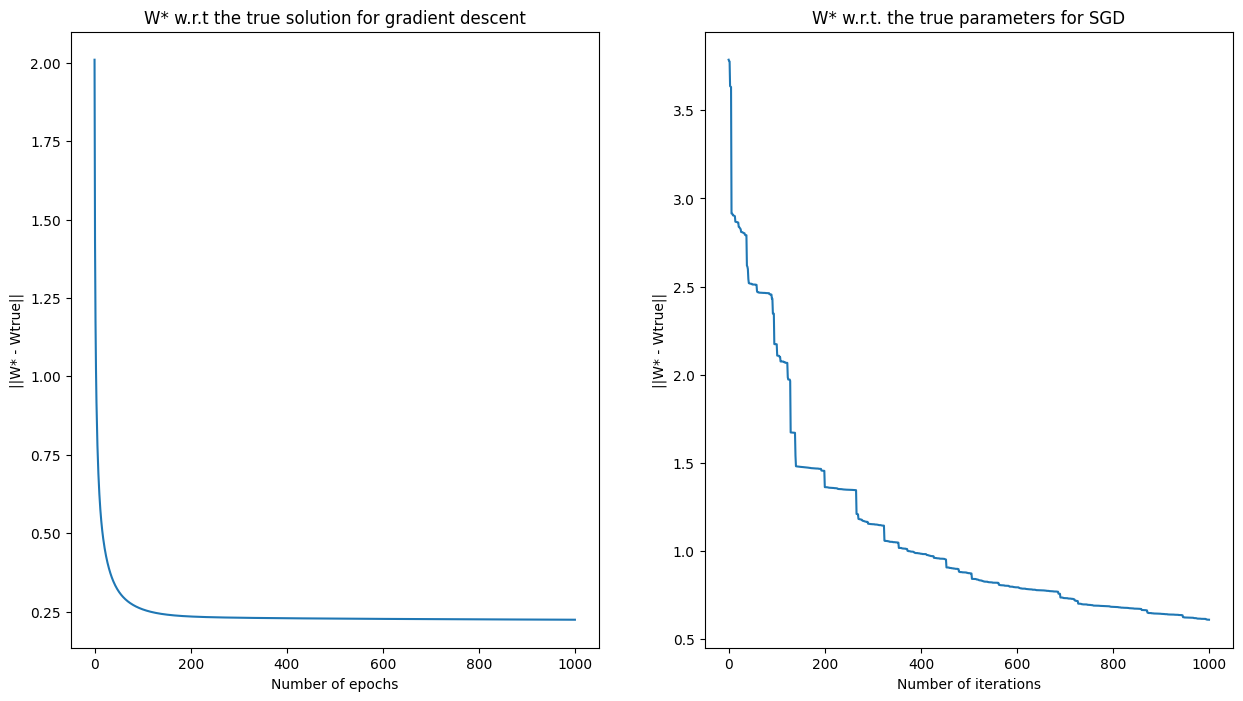

In [16]:
k = 20

theta_true = np.ones((k, 1))

synt_data = np.linspace(-1, 1, 100)

Phi = np.vander(synt_data, k)
ytrue = Phi @ theta_true 


w0 = np.random.normal(0, 0.1, (k, 1))
thetha_ML_arrayGD, _, _, _ = SGD_second(
                            f3(k), grad_f3(k), w0,
                            (np.reshape(synt_data, (synt_data.shape[0], 1)), ytrue),
                            batch_size = 100, 
                            n_epochs = 1000, 
                            alpha=0.005
                            )


w0 = np.random.normal(0, 0.1, (k, 1))
theta_true = np.ones((k, 1))

synt_data = np.linspace(-1, 1, 100)

Phi = np.vander(synt_data, k)
ytrue = Phi @ theta_true 


theta_ML_arraySGD, _, _, _, = SGD_second(
                            f3(k), grad_f3(k), w0, 
                            (np.reshape(synt_data, (synt_data.shape[0], 1)), ytrue),
                            batch_size = 1,
                            n_epochs =  10, 
                            alpha=0.005
                            )
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.plot(range(thetha_ML_arrayGD.shape[0]), np.linalg.norm(thetha_ML_arrayGD - theta_true.reshape(1, k), axis = 1))
plt.title("W* w.r.t the true solution for gradient descent")
plt.xlabel("Number of epochs")
plt.ylabel('||W* - Wtrue||')

plt.subplot(1, 2, 2)
plt.plot(range(theta_ML_arraySGD.shape[0]), np.linalg.norm(theta_ML_arraySGD - theta_true.reshape(1, k), axis = 1))
plt.title("W* w.r.t. the true parameters for SGD")
plt.xlabel("Number of iterations")
plt.ylabel('||W* - Wtrue||')
plt.show()